## Regression Analysis: Energy Efficiency Regression

### Overview: 
This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


### Objective
This notebook demonstrates how to build and evaluate predictive models for the UCI Energy Efficiency dataset.

We aim to predict the **Heating Load** of buildings using two regression methods:
- Linear Regression
- Neural Network (MLPRegressor)

### Instructions for Students
1. Explore the dataset structure and identify relevant features.
2. Preprocess the data (e.g., normalization, train-test split).
3. Train a linear regression model and evaluate its performance.
4. Take a look at the coefficients of the model, what do you notice?
5. Train a lasso regression model and evaluate its performance.
6. Interpret model results and visualize prediction quality.
7. Train a Neural Network


Reference: Tsanas, A. & Xifara, A. (2012). Energy Efficiency [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

Follow the Jupyter notebook below and answer the tasks marked as ✅ Task for Students.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
dataset = pd.read_excel(url)
dataset.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
              'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']
dataset.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# Check for missing values and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
dataset.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
df = dataset.copy()

In [8]:
df.corr().round(2)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
Surface_Area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
Wall_Area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
Roof_Area,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
Overall_Height,0.83,-0.86,0.28,-0.97,1.00,0.00,-0.00,-0.00,0.89,0.90
Orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
Glazing_Area,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.21,0.27,0.21
Glazing_Area_Distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Heating_Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling_Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


#### Plot the pairwise correlation heatmap between the features, analyze the plot.
Which features do you expect to have the highest weight in the regression equation?

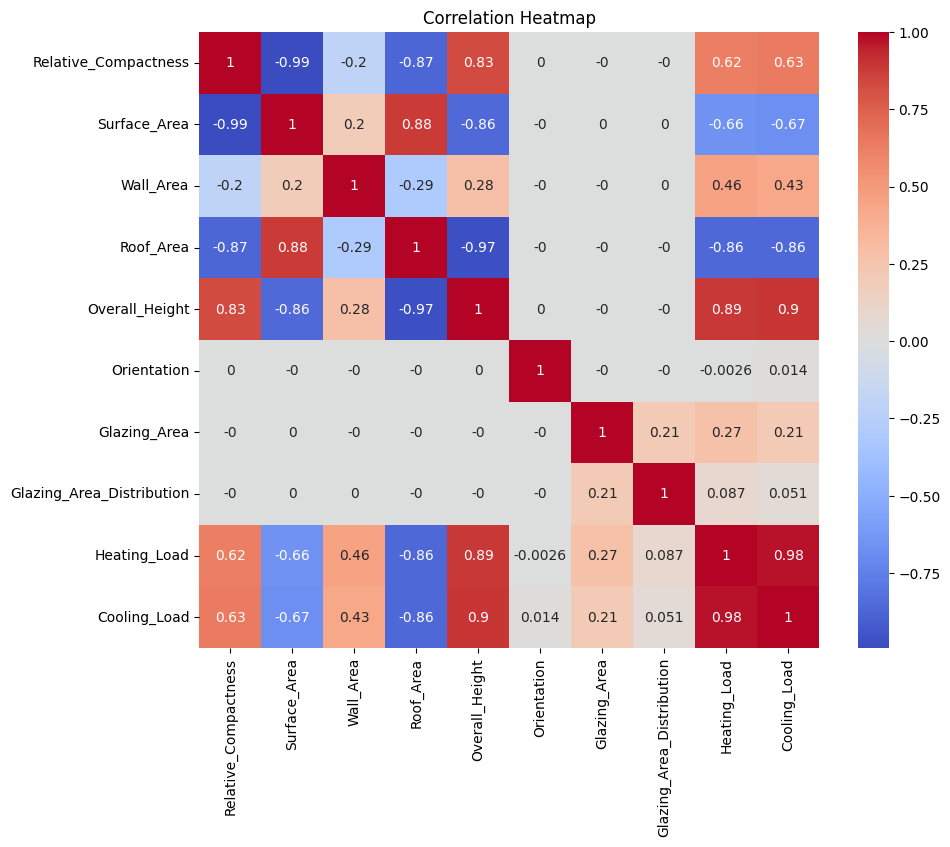

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr().round(4), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

####  Preprocessing:
-  Select features and target
-  split the data into train and test data
-  normalize the data 

In [ ]:
# Select features and target
feature_names = [x for x in df.columns if x != 'Heating_Load']
X = df[feature_names]
y = df['Heating_Load']

In [20]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size = 0.2)

In [ ]:
# Normalize features
# SUPER IMPORTANT, since LR coefficients make sense only when features are scaled.
# Use standard scaler since there are not that much outliers.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### ✅ Task for Students: Fit a simple Linear Regression model without changing any options

In [28]:
# create and fit linear regression model
# your code here
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Evaluation Metrics
1. The **R²(Coefficient of Determination)** indicates how much variance in the target is explained by the model.

    $$
    R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
    $$
    
    Where:
    
    * $SS_{\text{res}} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$
      (Residual Sum of Squares: error between true and predicted values)
    
    * $SS_{\text{tot}} = \sum_{i=1}^{n}(y_i - \bar{y})^2$
      (Total Sum of Squares: error between true values and their mean)
    
    * $y_i$: true value
    
    * $\hat{y}_i$: predicted value
    
    * $\bar{y}$: mean of all $y_i$

    Interpretation
    * $R^2 = 1$: perfect prediction
    * $R^2 = 0$: model predicts no better than mean
    * $R^2 < 0$: model is worse than just predicting the mean




2. The **MSE** gives the average squared error — smaller values are better.



  
3. The scatter plot helps visually identify how close the predictions are to the true values.

#### ✅ Task for Students: find and print the R2 score on test data

In [32]:
# your code here
y_pred = lr.predict(X_test_scaled)

In [33]:
r2 =r2_score(y_test, y_pred)
print(r2)
"""
r2 score = 0.963 --> excellent, very close to perfect prediction.
"""


0.9637162510918287


#### ✅ Task for Students: find and print the MSE for the test data 

In [35]:
# your code here
mse = mean_squared_error(y_test, y_pred)
print('mse score is: ',mse)

mse score is:  3.781942566475851


#### ✅ Task for Students: Plot a scatter plot for the true vs predicted values

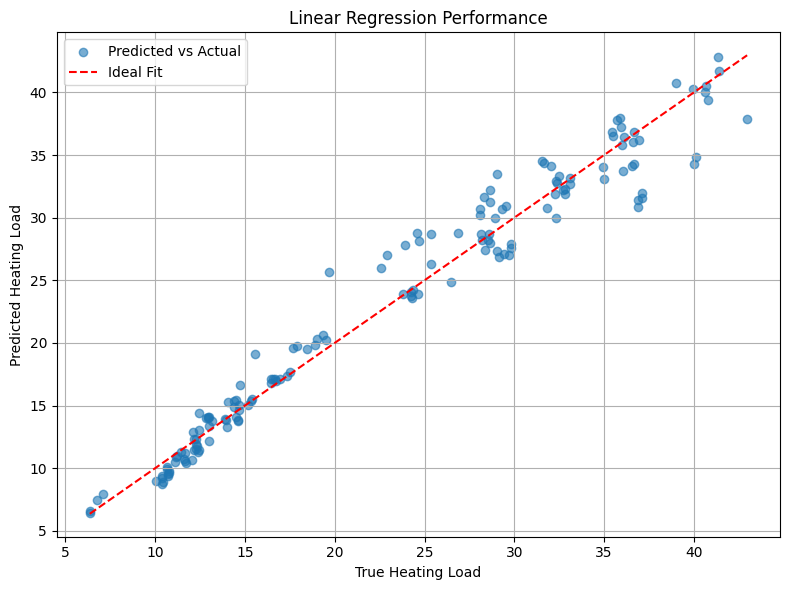

In [36]:
# your code here
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')

plt.xlabel('True Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Linear Regression Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### ✅ Task for Students: find and plot the coefficients of the linear regression model 
what are the highest coefficients, what do you notice? 

In [ ]:
#Feature names and coefficients
feature_names = X.columns
coefficients = lr.coef_

In [50]:
#coefficients is an array of numbers without labels, so we have to create a df.
coefficients

array([-1.08656267, -0.60288256,  0.69534683, -0.92620031,  2.08038395,
       -0.08029222,  1.26236317,  0.28939766,  6.86784856])

In [75]:
#1. Create df for coefficients values w.r.t feature names
#2. Create an absolute column to sort correct value using np.abs()
importance_df= pd.DataFrame(
    {
        'Feature': feature_names,
        'Coefficient':coefficients
    }
)

importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by = 'Abs_Coefficient',ascending = True)

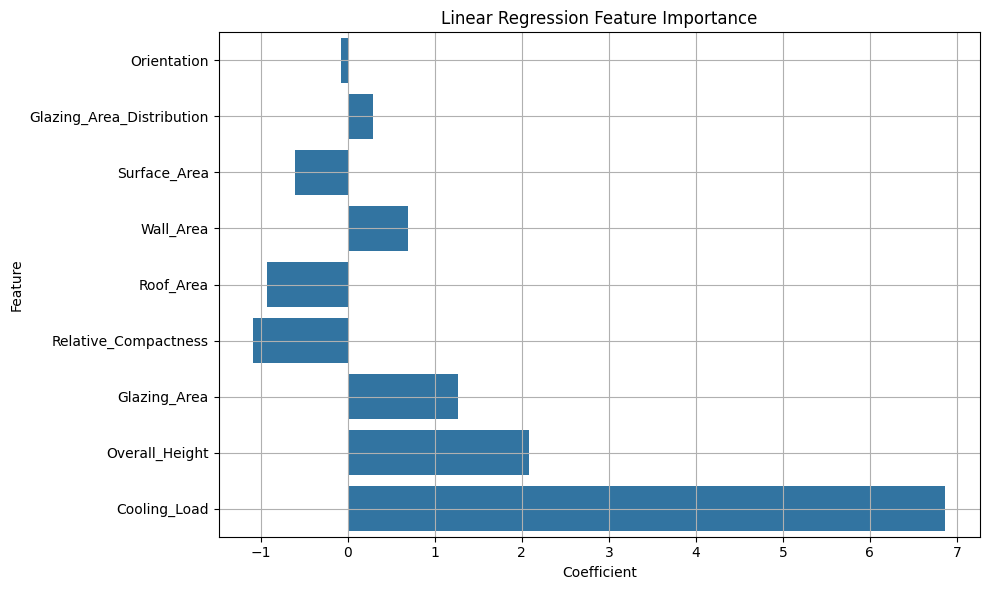

In [76]:
#Plot using barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient',y ='Feature',data=importance_df)
plt.title('Linear Regression Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

### Lasso Regression
Lasso(L1 Regularization) minimizes the sum of squared errors **plus** a penalty proportional to the **absolute values of the coefficients**. This L1 penalty encourages **sparsity**, meaning it pushes some coefficients to **zero**, effectively performing feature selection.

The loss function of Lasso regression is:

$$\mathcal{L}(\beta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2 + \alpha \sum_{j=1}^{p} |w_j|$$

Where:
* $m$: number of samples
* $y_i$: actual target value for sample $i$
* $\hat{y}_i = X_i \cdot \beta$: predicted value for sample $i$
* $w_j$: the $j$-th coefficient of the model
* $\alpha \geq 0$: regularization strength
* The **first term** is the **mean squared error (MSE)**
* The **second term** is the **L1 penalty** (sum of absolute values of the coefficients)

#### ✅ Task for students:
Define a Lasso regression model and prepare it for hyperparameter tuning using a range of alpha values using sklearn GridSearchCV with Logspace for Alpha logspace(-4, 0, 50). 

##### Why Use `np.logspace(-4, 0, 50)` for Alpha?
In Lasso regression, the `alpha` parameter controls the **strength of the L1 regularization**:

* A small `alpha` ≈ 0 → model behaves like regular linear regression (little regularization)
* A large `alpha` → more coefficients are shrunk to zero (stronger regularization)

**We use `logspace` instead of `linspace`** because:

* The effect of `alpha` is **non-linear**.
* Useful alpha values often **span several orders of magnitude**.
* `np.logspace(-4, 0, 50)` gives 50 values ranging from $10^{-4}$ to $10^0 = 1$, ensuring:

  * Fine granularity at small values (which matter a lot),
  * Broad enough range to find an optimal regularization strength.

This avoids over- or under-regularization and helps find a good trade-off between bias and variance.


##### What Are the Possible Values for `alpha`?

With `np.logspace(-4, 0, 50)`, the 50 `alpha` values range from:

```
[0.0001, 0.000120, ..., 1.0]
```

They are spaced **logarithmically**, so each is a fixed multiple of the previous one:

* First value ≈ 0.0001 (10⁻⁴)
* Last value = 1.0 (10⁰)
* The intermediate values are spaced such that:

  $$
  \alpha_i = 10^{\left(-4 + \frac{i \cdot 4}{49} \right)}, \quad i = 0, 1, ..., 49
  $$

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the range of alpha values
alphas = np.logspace(-4, 0, 50) #50 values range from 10^-4 = 0.0001 to 10^0 = 1

#Lasso model
model = Lasso(max_iter=10000)

# Set up the GridSearchCV for Lasso to return lasso_cv
"""
GridSearchCV is a method used to:
1. Search for the best hyperparameters.
2. Train and evaluate model combination using cross-validation.
3. Return the best model automatically.
4. We need: a model (Lasso), a param_grid ={} and a cv (k-fold cross validation)
    - Model Lasso good for feature selection.
    - param_grid defines what hyperparams we want to test. here we test alpha, which controls the regularization strength.
    - cv = 5: 5-fold cross-validation: split TRAIN data into 5 equal folds. Pick 1 for validation, the remaining 4 for training. Repeat all of them so that every fold is a validation fold.
    - Cross-validation benefit: better evaluation method, reduce risk of overfitting to a single train/test split.
"""
lasso_cv = GridSearchCV(
    model,
    param_grid = {'alpha': alphas},
    cv = 5
)

#### ✅ Task for students: 
Train the Model on the Scaled Training Set and find the alpha of the best model

In [60]:
# Fit the lasso_cv model
lasso_cv.fit(X_train_scaled, y_train)

,estimator,Lasso(max_iter=10000)
,param_grid,{'alpha': array([1.0000...00000000e+00])}
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(0....9518105153717)


In [65]:
# Print Lasso results
print(f'Best alpha: {lasso_cv.best_params_}')
print(f'Best CV score: {lasso_cv.best_score_}')
print(f'Final trained model: {lasso_cv.best_estimator_}')
print(f'Detail results: {lasso_cv.cv_results_}')

Best alpha: {'alpha': np.float64(0.023299518105153717)}
Best CV score: 0.9694314184074899
Final trained model: Lasso(alpha=np.float64(0.023299518105153717), max_iter=10000)
Detail results: {'mean_fit_time': array([0.00616226, 0.00317287, 0.00264468, 0.00257478, 0.00243397,
       0.00279398, 0.00208931, 0.00248752, 0.00196996, 0.00190887,
       0.0017983 , 0.00186949, 0.00180593, 0.00199337, 0.00199976,
       0.00504675, 0.00389299, 0.00314775, 0.00250368, 0.00215945,
       0.0016531 , 0.00169911, 0.00166903, 0.00145135, 0.00115504,
       0.00089216, 0.00079021, 0.00063877, 0.00085053, 0.00071583,
       0.0006762 , 0.00063806, 0.00073833, 0.00057821, 0.00056067,
       0.00061216, 0.00055084, 0.00066915, 0.00071006, 0.00058103,
       0.00054798, 0.00058036, 0.00109   , 0.00061035, 0.0005928 ,
       0.00060534, 0.00059028, 0.00057497, 0.00050678, 0.00049758]), 'std_fit_time': array([6.09991932e-03, 1.04127201e-03, 1.05635256e-03, 1.15393151e-03,
       1.10826660e-03, 9.86393780e

#### ✅ Task for students: 
Print and plot Feature Coefficients for Lasso Regression 

In [73]:
# Print and plot feature importances
# your code here
best_lasso_model = lasso_cv.best_estimator_
best_lasso_model
lasso_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lasso_model.coef_,
    'Abs_Coefficient':np.abs(best_lasso_model.coef_)
}).sort_values(by='Abs_Coefficient' ,ascending=True)
lasso_df


,Feature,Coefficient,Abs_Coefficient
0,Relative_Compactness,0.000000,0.000000
1,Surface_Area,-0.000000,0.000000
5,Orientation,-0.055514,0.055514
3,Roof_Area,-0.077141,0.077141
7,Glazing_Area_Distribution,0.270386,0.270386
2,Wall_Area,0.899407,0.899407
6,Glazing_Area,1.221498,1.221498
4,Overall_Height,2.343608,2.343608
8,Cooling_Load,6.980804,6.980804


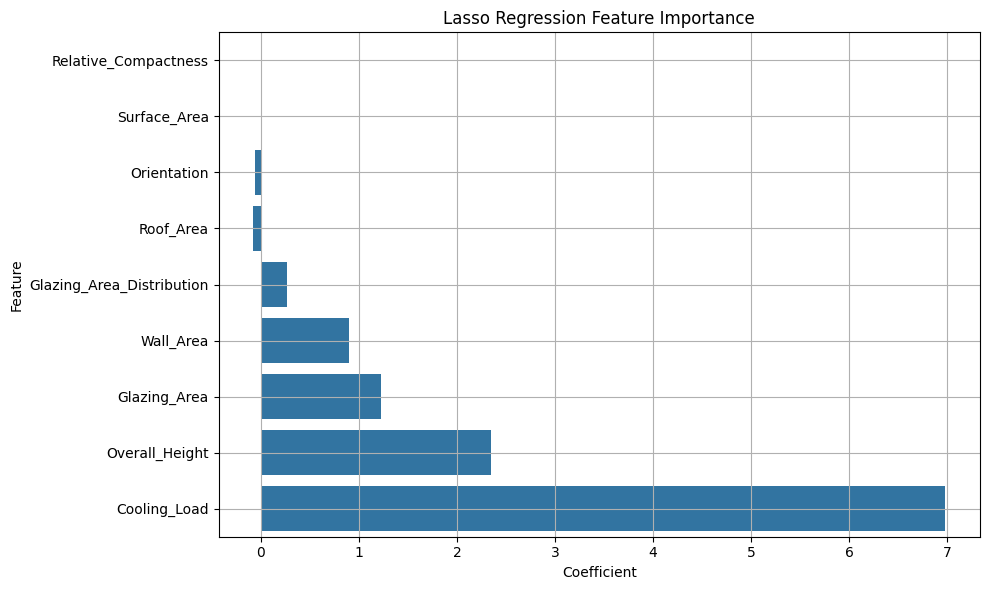

In [74]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_df)
plt.title('Lasso Regression Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Summary
**Lasso** gives more interpretable and expected coefficients compared to plain **Linear Regression (LR)** in this case.
 

##### What Happens in this Case?

In the UCI Energy dataset:

* Several features (like `Surface_Area`, `Wall_Area`, `Roof_Area`) are **correlated**.
* **Multicollinearity** causes **Linear Regression** to:

  * Spread "credit" across these features
  * Assign large or unstable coefficients even to less important ones (like `Roof_Area`)
* This is why your LR model gave **unexpected top features** (e.g., high weight for `Roof_Area` despite low correlation)


#####  Why Lasso Performs Better Here

* **Lasso adds an L1 penalty**: It **forces the model to "choose"** between correlated features — selecting those with stronger direct influence on the target (e.g., `Overall_Height`, `Relative_Compactness`).
* This **sparsity effect** reveals clearer feature importance and aligns better with domain knowledge.


##### Summary for Students

* Linear Regression fits **all** features and can be misled by multicollinearity.
* Lasso **penalizes** large, unnecessary coefficients and gives **simpler, clearer models**.
* In high-dimensional or correlated feature sets, **Lasso gives more reliable importance insights**.